# Exercise 1 Basic Naive Bayes

1) What exactly do we want to calculate to decide whether we will hvae more than 1000 audiences or not.

P(Y | Weather)

2) What are our features?

Weathers

3) What are our classes?

Yes/No

4) What is the assumption we made at make the probability calculation more probable?

Weathers are independent

5) How do we calculate the conditional terms from the data?

$P(A \cap B ) = P(A | B)\times P(B)$

6) How do we calculate the prior term from the data?

Either from Histrory OR 50/50

7) How do we calculate the evidence term?

$\tilde{P}(Yes | Weather) + \tilde{P}(No | Weather)$

8) Calculate the product of conditional terms and prior term for the probability that we will have more than 1000 audiences on a Sunny Hot Normal Weak wind day.

$Condition\space term = P(R\space |\space Yes) \times P(C\space |\space Yes) \times P(N\space |\space Yes) \times P(St\space |\space Yes) \times P(Yes)$

$Condition\space term =\displaystyle \frac{2}{9} \times \frac{2}{9} \times \frac{6}{9} \times \frac{5}{9} \times Prior \space term$



$Prior\space term = P(Yes)$


In [4]:
print (2*2*6*5)/(9.0**4)
print 9.0/14

0.0182898948331
0.642857142857


9) Calculate the same thing for the case when we have less than or equal to 1000 audiences on a Sunny Hot Normal Weak day.

In [6]:
print (3*2*1*2)/(5.0**4)
print 5.0/14

0.0192
0.357142857143


10) What is the probability that we will have more than 1000 audience on a Sunny Hot Normal Weak day?

$\tilde{P}(Yes/No\space |\space Weather) = Condition\space term \times Prior\space term$

$P(Yes\space | \space Weather) = \displaystyle\frac{\tilde{P}(Yes\space |\space Weather)}{\tilde{P}(Yes\space | \space Weather) \times \tilde{P}(No\space |\space Weather)}$

In [10]:
PY = ((2*2*6*5)/(9.0**4)) * (9.0/14)
PN = ((3*2*1*2)/(5.0**4)) * (5.0/14)

print PY / (PY + PN)

0.631632137443


11) What is the probability that we will NOT have more than 1000 audience on a Sunny Hot Normal Weak day?

In [11]:
PY = ((2*2*6*5)/(9.0**4)) * (9.0/14)
PN = ((3*2*1*2)/(5.0**4)) * (5.0/14)

print PN / (PY + PN)

0.368367862557


# Part 2 Bayesian Spam Detection

Make your own spam filter!!!

In [18]:
#spam
#Naive Bayes
#get word count from spam and ham

%matplotlib inline
from matplotlib import pyplot as plt
import math

In [1]:
#read all the email files
#put all ham emails into ham_emails
#put all spam emails into spam_emails

from glob import glob
ham_files = glob('data/enron1/ham/*.txt')
spam_files = glob('data/enron1/spam/*.txt')

def read_emails(files):
    tmp = []
    for path in files:
        with open(path) as f:
            tmp.append(f.read())
    return tmp

ham_emails = read_emails(ham_files)
spam_emails = read_emails(spam_files)

In [24]:
import re
def cleanup(w):
    #remove all non character symbols
    s = w.lower()
    return re.sub(r'[^a-zA-Z]', '', s)

def tokenize(email):
    #tokenize and filter token using length and get rid of common neutral words
    tokens = email.split(' ')
    clean_tokens = map(cleanup , tokens)
    conjunctions = set(['a','the','an','in','on','at','of','by','','is','not','if','or','and','to','this','that','be','am','are','ect','for','hou','will','subject'])
    clean_tokens = filter(lambda x: x not in conjunctions and len(x)>2, clean_tokens)
    return clean_tokens

def word_counts(tokens):
    #return a dictionary of word->count
    ret = {}
    for w in tokens:
        old = ret[w] if w in ret else 0
        ret[w] = old+1
    return ret

def calculate_probs(emails):
    #IMPLEMENT THIS
    #emails that put in should be spam/ham emails set
    #this should return a dictionary of word -> P(word|spam)
    #or P(word|ham) if the emails in is ham emails
    probs = {}
    num_words = 0.0
    
    s = ' '.join(emails)
    tk = tokenize(s)
    wc = word_counts(tk)
    num_words += len(tk)
    
    for k, v in wc.iteritems():
        probs[k] = math.log(v/num_words)

    return probs, num_words


In [25]:
#calculate_probs(ham_emails)

In [76]:
ham_probs, ham_num_words = calculate_probs(ham_emails)
spam_probs, spam_num_words = calculate_probs(spam_emails)

HS = float(len(ham_emails))
SS = float(len(spam_emails))

PH = HS / (SS + HS)
PS = SS / (SS + HS)

print PH, PS
#print ham_probs, ham_num_words

0.709976798144 0.290023201856


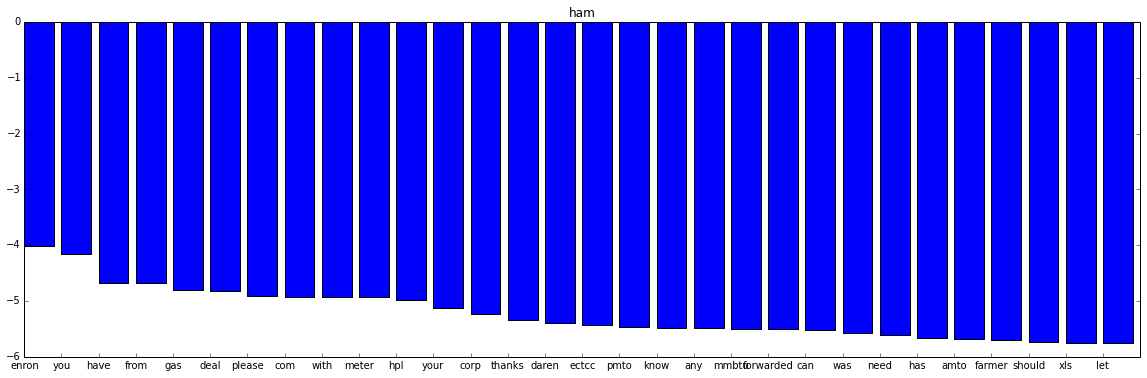

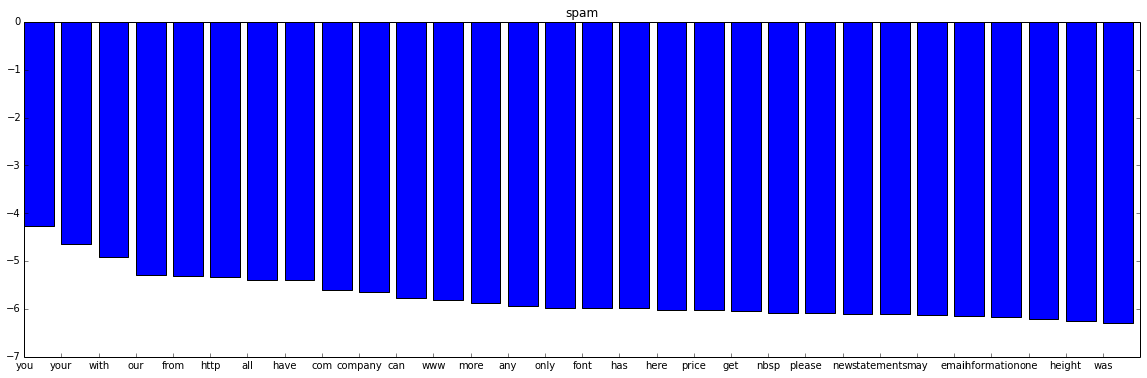

In [27]:
def top_words(probs, n, title):
    #plot out top words
    ham_top = sorted(probs.iteritems(), key=lambda x: x[1], reverse=True)[:n]
    x = [xx[0] for xx in ham_top]
    y = [xx[1] for xx in ham_top]
    plt.figure(figsize=(20,6))
    plt.bar(range(len(x)),y)
    plt.xticks(range(len(x)), x)
    plt.title(title)   
top_words(ham_probs, 30, "ham")
top_words(spam_probs, 30, "spam")

In [46]:
# def increment(word, dic, size):
#     if word in dic.keys():
#         return dic[word]
#     else:
#         return math.log(1.0/size)

In [66]:
#now combine all the above to make a function that calculate P(spam | words in email) test it on enron 2 folder
def isHam(email, dic, size):
    tk = tokenize(email)
    prob = math.log(PH)
    for word in tk:
        if word in dic:
            prob += dic[word]
        else:
            prob += math.log(1.0/size)
    return prob

def isSpam(email, dic, size):
    tk = tokenize(email)
    prob = math.log(PH)
    for word in tk:
        if word in dic:
            prob += dic[word]
        else:
            prob += math.log(1.0/size)
    return prob
    

In [69]:
%timeit isHam(ham_emails[1], ham_probs, ham_num_words)

100 loops, best of 3: 3.64 ms per loop


In [62]:
print isHam(ham_emails[1])
print isSpam(ham_emails[1])

-1382.18505378
-1675.76460785


In [63]:
correct = 0
wrong = 0

for email in ham_emails:
    if (isHam(email) > isSpam(email)):
        correct += 1
    else:
        wrong += 1
        
for email in spam_emails:
    if (isSpam(email) > isHam(email)):
        correct += 1
    else:
        wrong += 1
print correct, wrong



5087 85


In [64]:
print correct/ (0.0 + correct + wrong)

0.983565351895


In [74]:
test_ham_files = glob('data/enron2/ham/*.txt')
test_spam_files = glob('data/enron2/spam/*.txt')

test_spam_emails = read_emails(test_spam_files)
test_ham_emails = read_emails(test_ham_files)

# ham_probs, ham_num_words = calculate_probs(test_ham_emails)
# spam_probs, spam_num_words = calculate_probs(test_spam_emails)

HS = float(len(ham_emails))
SS = float(len(spam_emails))

PH = HS / (SS + HS)
PS = SS / (SS + HS)

print PH, PS

0.709976798144 0.290023201856


In [77]:
correct = 0
wrong = 0

for email in test_ham_emails:
    if (isHam(email, ham_probs, ham_num_words) > isSpam(email, spam_probs, spam_num_words)):
        correct += 1
    else:
        wrong += 1
        
for email in test_spam_emails:
    if (isSpam(email, spam_probs, spam_num_words) > isHam(email, ham_probs, ham_num_words)):
        correct += 1
    else:
        wrong += 1
print correct, wrong
print correct / (correct + wrong + 0.0)

5309 548
0.90643674236
